In [1]:
# Imports
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stops = pd.read_csv('../data/stops.csv')

stops.head()

,Route ID,Stop ID,Stop Name,Latitude,Longitude
0,MTA%20NYCT_Q1,MTA_500002,165 ST/HILLSIDE AV,40.709146,-73.797156
1,MTA%20NYCT_Q1,MTA_500004,HILLSIDE AV/171 ST,40.711440,-73.790887
2,MTA%20NYCT_Q1,MTA_500007,HILLSIDE AV/180 ST,40.712872,-73.782724
3,MTA%20NYCT_Q1,MTA_500008,HILLSIDE AV/182 PL,40.713574,-73.779850
4,MTA%20NYCT_Q1,MTA_500009,HILLSIDE AV/184 ST,40.714085,-73.777516


In [3]:
stops.columns = ['route_id', 'stop_id', 'stop_name', 'latitude', 'longitude']
stops.head()

,route_id,stop_id,stop_name,latitude,longitude
0,MTA%20NYCT_Q1,MTA_500002,165 ST/HILLSIDE AV,40.709146,-73.797156
1,MTA%20NYCT_Q1,MTA_500004,HILLSIDE AV/171 ST,40.711440,-73.790887
2,MTA%20NYCT_Q1,MTA_500007,HILLSIDE AV/180 ST,40.712872,-73.782724
3,MTA%20NYCT_Q1,MTA_500008,HILLSIDE AV/182 PL,40.713574,-73.779850
4,MTA%20NYCT_Q1,MTA_500009,HILLSIDE AV/184 ST,40.714085,-73.777516


In [5]:
stops['route_id'] = ['_'.join(route.split('%20')) for route in stops['route_id']]
stops.head()

,route_id,stop_id,stop_name,latitude,longitude
0,MTA_NYCT_Q1,MTA_500002,165 ST/HILLSIDE AV,40.709146,-73.797156
1,MTA_NYCT_Q1,MTA_500004,HILLSIDE AV/171 ST,40.711440,-73.790887
2,MTA_NYCT_Q1,MTA_500007,HILLSIDE AV/180 ST,40.712872,-73.782724
3,MTA_NYCT_Q1,MTA_500008,HILLSIDE AV/182 PL,40.713574,-73.779850
4,MTA_NYCT_Q1,MTA_500009,HILLSIDE AV/184 ST,40.714085,-73.777516


In [6]:
stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   route_id   2300 non-null   object 
 1   stop_id    2300 non-null   object 
 2   stop_name  2300 non-null   object 
 3   latitude   2300 non-null   float64
 4   longitude  2300 non-null   float64
dtypes: float64(2), object(3)
memory usage: 90.0+ KB


In [7]:
stops_gdf = gpd.GeoDataFrame(
    stops, geometry = gpd.points_from_xy(stops['longitude'], stops['latitude']), crs="EPSG:4326"
)

stops_gdf.head()

,route_id,stop_id,stop_name,latitude,longitude,geometry
0,MTA_NYCT_Q1,MTA_500002,165 ST/HILLSIDE AV,40.709146,-73.797156,POINT (-73.79716 40.70915)
1,MTA_NYCT_Q1,MTA_500004,HILLSIDE AV/171 ST,40.711440,-73.790887,POINT (-73.79089 40.71144)
2,MTA_NYCT_Q1,MTA_500007,HILLSIDE AV/180 ST,40.712872,-73.782724,POINT (-73.78272 40.71287)
3,MTA_NYCT_Q1,MTA_500008,HILLSIDE AV/182 PL,40.713574,-73.779850,POINT (-73.77985 40.71357)
4,MTA_NYCT_Q1,MTA_500009,HILLSIDE AV/184 ST,40.714085,-73.777516,POINT (-73.77752 40.71408)


<Axes: >

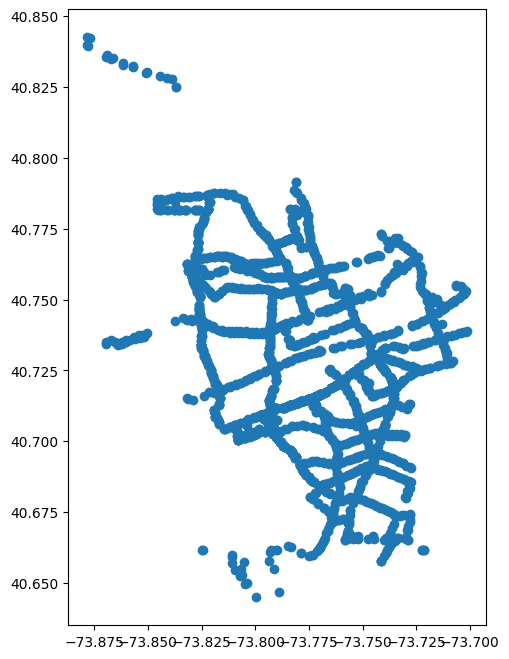

In [11]:
fig, ax = plt.subplots(figsize = (8,8))
stops_gdf.plot(ax = ax)